In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Name,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [3]:
dropped_dataset = df.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'])
dropped_dataset

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [4]:
dropped_dataset['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

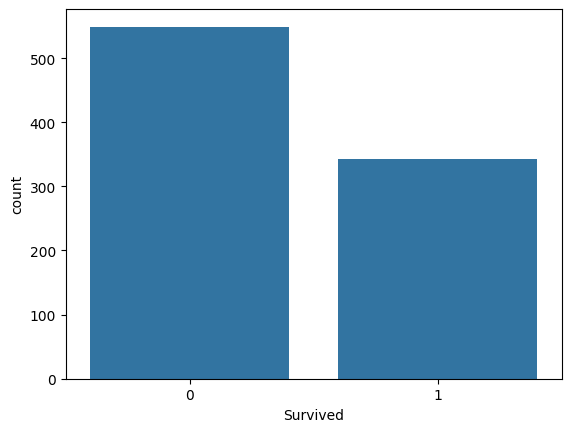

In [6]:
sns.countplot(dropped_dataset, x='Survived')

In [7]:
survival_rate = dropped_dataset['Survived'].value_counts()/dropped_dataset['Survived'].count()
survival_rate

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

In [8]:
dropped_dataset.groupby(['Gender'])['Survived'].mean()

Gender
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [9]:
dropped_dataset.groupby(['Gender', 'Pclass'])['Survived'].mean()

Gender  Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [10]:
survivied_class_gender = dropped_dataset.pivot_table(index = ['Gender'], columns = ['Pclass'], values= ['Survived'], aggfunc='mean')
survivied_class_gender

Survived                    
Pclass         1         2         3
Gender                              
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [11]:
survivied_class_gender

Survived                    
Pclass         1         2         3
Gender                              
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: ylabel='Gender'>

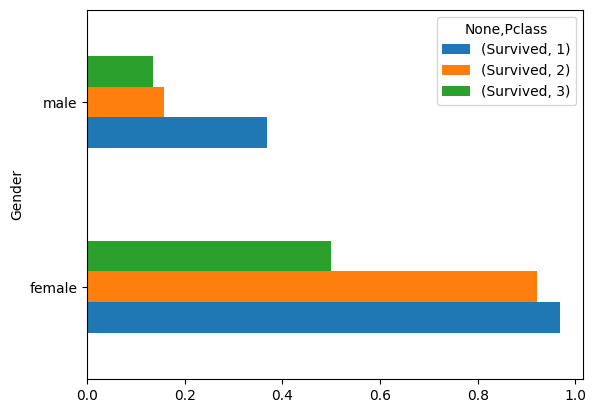

In [12]:
survivied_class_gender.plot.barh()

In [13]:
import numpy as np

In [14]:
dropped_dataset['bins'] = pd.cut(dropped_dataset['Age'], bins=[0,18,80])
dropped_dataset


,Pclass,Gender,Age,Fare,Survived,bins
0,3,male,22.0,7.2500,0,"(18.0, 80.0]"
1,1,female,38.0,71.2833,1,"(18.0, 80.0]"
2,3,female,26.0,7.9250,1,"(18.0, 80.0]"
3,1,female,35.0,53.1000,1,"(18.0, 80.0]"
4,3,male,35.0,8.0500,0,"(18.0, 80.0]"
...,...,...,...,...,...,...
886,2,male,27.0,13.0000,0,"(18.0, 80.0]"
887,1,female,19.0,30.0000,1,"(18.0, 80.0]"
888,3,female,NaN,23.4500,0,NaN
889,1,male,26.0,30.0000,1,"(18.0, 80.0]"


In [15]:
survival_rate_all = dropped_dataset.pivot_table(index = ['Gender'], columns = ['Pclass', 'bins'], values= ['Survived'], aggfunc='mean')
survival_rate_all


Survived                                                
Pclass         1                 2                   3          
bins     (0, 18]  (18, 80] (0, 18]  (18, 80]   (0, 18]  (18, 80]
Gender                                                          
female  0.909091  0.972973     1.0  0.900000  0.511628  0.423729
male    0.800000  0.375000     0.6  0.071429  0.215686  0.133663

In [16]:
from matplotlib import pyplot as plt

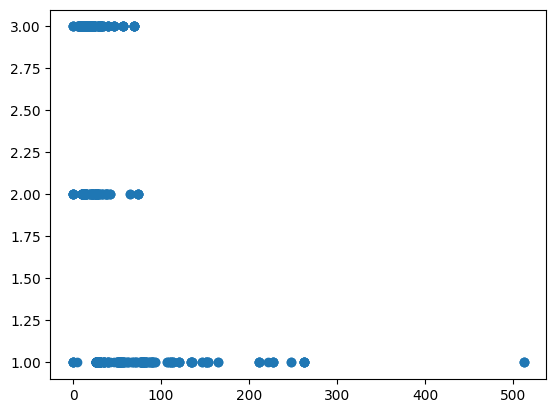

In [17]:
plt.scatter(dropped_dataset['Fare'], dropped_dataset['Pclass'])

In [18]:
target = dropped_dataset['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [19]:
df_training = dropped_dataset.drop(columns=['Survived', 'bins'], axis = 1)
df_training

,Pclass,Gender,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,NaN,23.4500
889,1,male,26.0,30.0000


In [20]:
new_data = pd.get_dummies(df_training['Gender'], dtype=float)
new_data

,female,male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0
889,0.0,1.0


In [21]:
df_training.drop(columns='Gender', inplace=True)
df_training

,Pclass,Age,Fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,NaN,23.4500
889,1,26.0,30.0000


In [22]:
df_training = pd.concat([df_training, new_data], axis = 1)
df_training

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0.0,1.0
1,1,38.0,71.2833,1.0,0.0
2,3,26.0,7.9250,1.0,0.0
3,1,35.0,53.1000,1.0,0.0
4,3,35.0,8.0500,0.0,1.0
...,...,...,...,...,...
886,2,27.0,13.0000,0.0,1.0
887,1,19.0,30.0000,1.0,0.0
888,3,NaN,23.4500,1.0,0.0
889,1,26.0,30.0000,0.0,1.0


In [23]:
df_training.describe()

,Pclass,Age,Fare,female,male
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.352413,0.647587
std,0.836071,14.526497,49.693429,0.477990,0.477990
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000,0.000000
50%,3.000000,28.000000,14.454200,0.000000,1.000000
75%,3.000000,38.000000,31.000000,1.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000,1.000000


In [24]:
df_training.isna().sum()

Pclass      0
Age       177
Fare        0
female      0
male        0
dtype: int64

In [25]:
age_mean = df_training['Age'].mean()
df_training['Age'].fillna(age_mean, inplace=True)

In [26]:
df_training

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0.0,1.0
1,1,38.000000,71.2833,1.0,0.0
2,3,26.000000,7.9250,1.0,0.0
3,1,35.000000,53.1000,1.0,0.0
4,3,35.000000,8.0500,0.0,1.0
...,...,...,...,...,...
886,2,27.000000,13.0000,0.0,1.0
887,1,19.000000,30.0000,1.0,0.0
888,3,29.699118,23.4500,1.0,0.0
889,1,26.000000,30.0000,0.0,1.0


<Axes: >

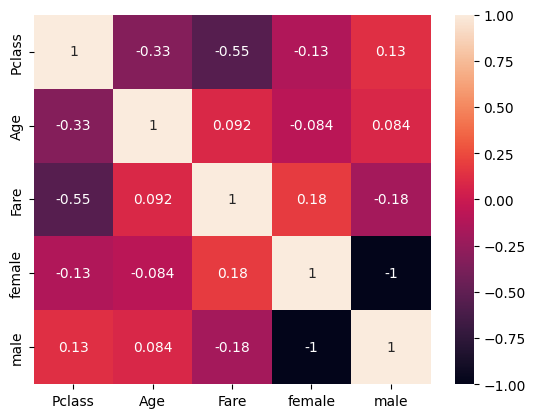

In [27]:
sns.heatmap(df_training.corr(), annot=True)

<Axes: xlabel='Age', ylabel='Count'>

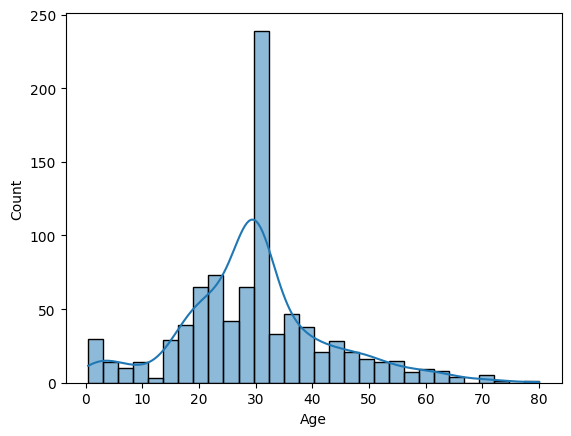

In [28]:
sns.histplot(df_training['Age'], kde=True)


<Axes: xlabel='Fare', ylabel='Count'>

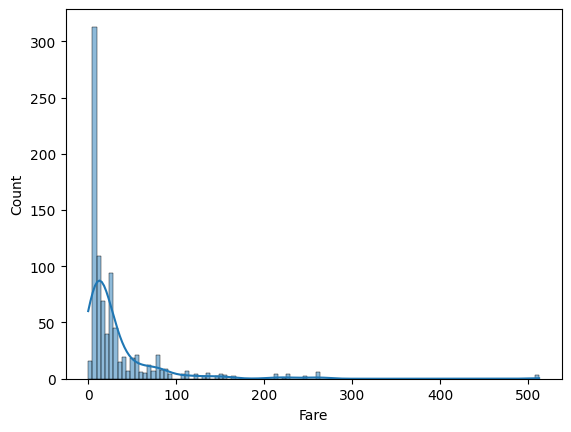

In [29]:
sns.histplot(df_training['Fare'], kde = True)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(df_training, target, test_size=0.2, random_state=10)

In [32]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 

In [33]:
model.fit(x_train, y_train)

GaussianNB()

In [34]:
y_pred = model.predict(x_test[:10])

In [35]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test[:10], y_pred)
accuracy

0.9

In [36]:
print(y_pred)
print(y_test[:10])

[0 0 0 1 1 0 0 0 0 0]
590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
Name: Survived, dtype: int64


In [37]:
print(model.predict_proba(x_test[:10]))

[[9.88386356e-01 1.16136435e-02]
 [9.86517813e-01 1.34821869e-02]
 [9.87819352e-01 1.21806477e-02]
 [1.69366845e-05 9.99983063e-01]
 [2.50380494e-03 9.97496195e-01]
 [9.86311511e-01 1.36884891e-02]
 [9.87645433e-01 1.23545669e-02]
 [9.73960508e-01 2.60394920e-02]
 [9.88379286e-01 1.16207142e-02]
 [9.87084311e-01 1.29156895e-02]]


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [39]:
y_pred_all = model.predict(x_test)
c_matrix = confusion_matrix(y_test, y_pred_all)

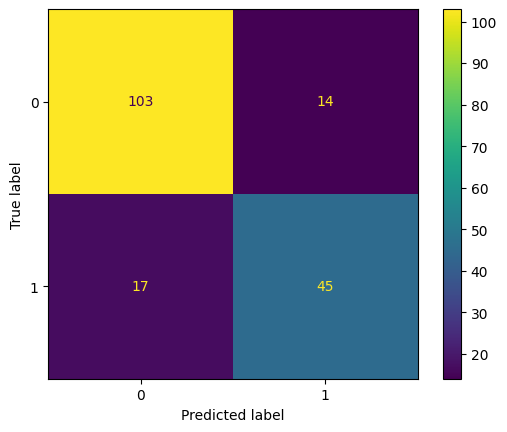

In [40]:
disp = ConfusionMatrixDisplay(c_matrix)
disp.plot()

In [41]:
print(classification_report(y_test, y_pred_all))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       117
           1       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



In [42]:
from sklearn.naive_bayes import CategoricalNB

In [43]:
df_training_categorized = df_training
df_training_categorized['Age'] = pd.cut(x=df_training_categorized['Age'], bins = 4, labels = [1,2,3,4])
df_training_categorized['Fare'] = pd.cut(x=df_training_categorized['Fare'], bins = 4, labels = [1,2,3,4])


In [44]:
df_training_categorized['Fare'].value_counts()

Fare
1    853
2     29
3      6
4      3
Name: count, dtype: int64

In [45]:
model_categorical = CategoricalNB()
xc_train, xc_test, yc_train, yc_test = train_test_split(df_training_categorized, target, test_size=0.2, random_state=10)
model_categorical.fit(xc_train, yc_train)

CategoricalNB()

In [47]:
y_pred_cat = model_categorical.predict(xc_test[:10])
cat_accuracy = accuracy_score(yc_test[:10], y_pred_cat)
cat_accuracy

0.9

In [48]:
print(y_pred_cat)
print(y_test[:10])

[0 0 0 1 1 0 0 0 0 0]
590    0
131    0
628    0
195    1
230    1
646    0
75     0
586    0
569    1
287    0
Name: Survived, dtype: int64


In [54]:
print(model_categorical.predict_proba(xc_test[:10]))

[[0.95819074 0.04180926]
 [0.94383329 0.05616671]
 [0.95819074 0.04180926]
 [0.00999844 0.99000156]
 [0.03782879 0.96217121]
 [0.94383329 0.05616671]
 [0.95819074 0.04180926]
 [0.86832262 0.13167738]
 [0.95819074 0.04180926]
 [0.95819074 0.04180926]]


In [51]:
y_pred_all_cat = model_categorical.predict(xc_test)
c_matrix_cat = confusion_matrix(yc_test, y_pred_all_cat)

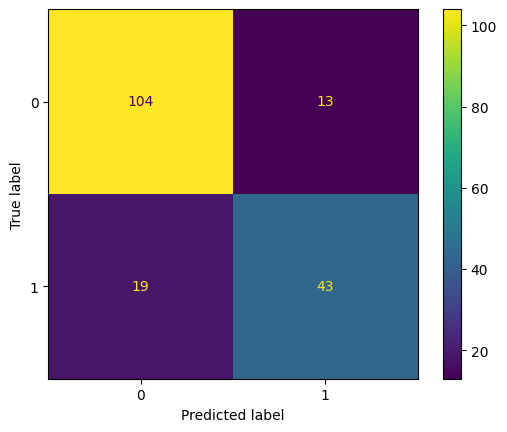

In [52]:
disp = ConfusionMatrixDisplay(c_matrix_cat)
disp.plot()

In [53]:
print(classification_report(y_test, y_pred_all_cat))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       117
           1       0.77      0.69      0.73        62

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179

